In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Problem 1

What kind of mapping from input to output would be created if the activation function in equation 3.1 was linear, so that $a[z] = \psi_0 + \psi_1z$? What kind of mapping would be created if the activation function was removed, so $a[z] = z$?

We have equation 3.1 which is

$$
y = \phi_0 + \phi_1 a[\theta_{10} + \theta_{11}x] + \phi_2 a[\theta_{20} + \theta_{21}x] + \phi_3 a[\theta_{30} + \theta_{31}x]
$$

which, after substituting the activation, function becomes:

$$
y = \phi_0 + \phi_1 (\psi_{0} + \psi_{1} (\theta_{10} + \theta_{11}x)) + \phi_2 (\psi_{0} + \psi_{1} (\theta_{20} + \theta_{21}x)) + \phi_3 (\psi_{0} + \psi_{1} (\theta_{30} + \theta_{31}x))
$$

which is a linear transformation follow by a translation, also known as an affine mapping. As we can see with the code below, such an activation function will only allow us to model a linear function. If we replace the activation function with the identity function, then one affine transformation is removed from the mapping, but this will nonetheless still result in a predictor that can model linear function.

theta=array([[-0.33937289, -0.16513302],
       [-0.73857295,  0.8657546 ],
       [-0.96732889,  0.97010162]])
phi=array([-0.05122422,  0.77523643, -0.54587239, -0.5002697 ])
psi0=0.33051486275671915 psi1=-0.2341178823545389
theta=array([[-0.33937289, -0.16513302],
       [-0.73857295,  0.8657546 ],
       [-0.96732889,  0.97010162]])


(-2.0, 2.0)

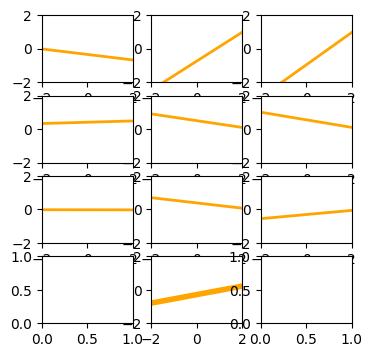

In [45]:
theta = np.random.random((3, 2)) * 2 - 1
phi = np.random.random(4) * 2 - 1
psi0, psi1 = np.random.random(2) * 2 - 1
a = np.vectorize(lambda x: psi0 + psi1 * x)

print(f"{theta=}")
print(f"{phi=}")
print(f"{psi0=} {psi1=}")
print(f"{theta=}")

n = 32
size = 2

fig, axs = plt.subplots(4, 3, figsize=(4, 4))
for i in range(3):
    X = np.linspace(-size, size, n)
    Y = theta[:, 0][i] + X * theta[:, 1][i]
    axs[0, i].plot(X, Y, lw=2, c="orange")
    axs[0, i].set_xlim([-size, size])
    axs[0, i].set_ylim([-size, size])
    Y = a(Y)
    axs[1, i].plot(X, Y, lw=2, c="orange")
    axs[1, i].set_xlim([-size, size])
    axs[1, i].set_ylim([-size, size])
    Y = phi[i] * Y
    axs[2, i].plot(X, Y, lw=2, c="orange")
    axs[2, i].set_xlim([-size, size])
    axs[2, i].set_ylim([-size, size])


f = np.vectorize(lambda x: np.dot(phi[1:], a(x * theta[:, 1] + theta[:, 0])) + phi[0])
Y = f(X)
axs[3, 1].plot(X, Y, lw=4, c='orange');
axs[3, 1].set_xlim(-size, size)
axs[3, 1].set_ylim(-size, size)

# Problem 2

For each of the four linear regions in figure 3.3j, indicate which hidden units are inactive and which are active.

A region is not active if the line has a slope of 0, so this becomes:

![problem 3.2](3.2.png)


# Problem 3*

Derive expressions for the positions of the "joints" in function in figure 3.3j in terms of the ten parameters $\phi$ and the input $x$. Derive expressions for the slopes of the four linear regions.

A joint is formed when one of the lines of a hidden unit crosses zero. The linear function of the first hidden unit is $\theta_{10} + \theta_{11}x$, if we set this equal to zero and solve for $x$ we find that $x = -\theta_{10} / \theta_{11}$. This means that we can find the three joints at the following $x$ values:

  1. $-\theta_{10} / \theta_{11}$
  2. $-\theta_{20} / \theta_{21}$
  3. $-\theta_{30} / \theta_{31}$

Determining the slope of a region depends on how many hidden units are activated for a given region. Suppose only one hidden unit is actived, given by $\phi_1(\theta_{10} + \theta_{11}x)$. In this case the y-intercept is $\phi_1\theta_{10}$ and the slope is $\phi_1\theta_{11}$. To find the slope at a given region, find the sum of all the slopes of the activated hidden units. The example below shows the different linear regions.
   

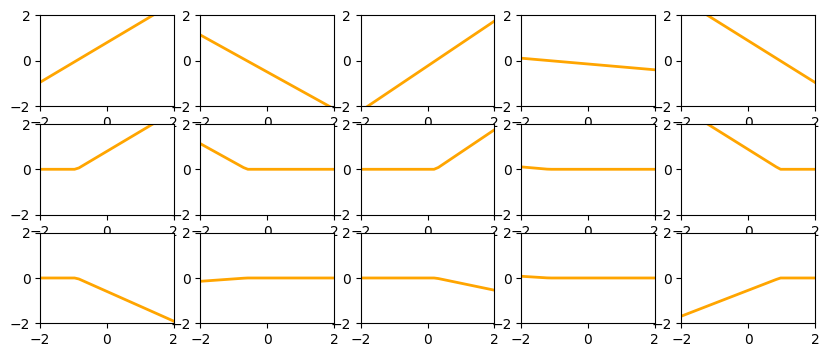

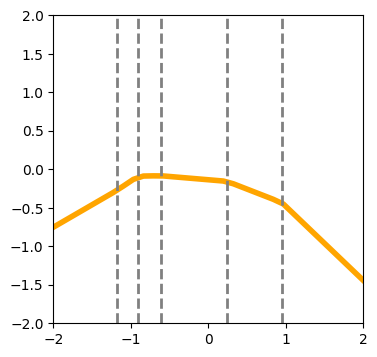

In [29]:
variables = 5
phi = np.random.random(variables) * 2 - 1
theta0 = np.random.random(variables) * 2 - 1
theta1 = np.random.random(variables) * 2 - 1

phi0 = 1
relu = lambda x: x if x > 0.0 else 0.0
vrelu = np.vectorize(relu)
sigmoid = lambda x: 1 / (1 + np.exp(-x))
vsigmoid = np.vectorize(sigmoid)
# activation_func = np.vectorize(math.erf)
activation_func = vrelu
size = 2
samples = 32

fig, axs = plt.subplots(3, variables, figsize=(2 * variables, 4))
for i in range(variables):
    X = np.linspace(-size, size, samples)
    Y = X * theta1[i] + theta0[i]
    axs[0, i].plot(X, Y, lw=2, c="orange")
    axs[0, i].set_xlim([-size, size])
    axs[0, i].set_ylim([-size, size])
    Y = activation_func(Y)
    axs[1, i].plot(X, Y, lw=2, c="orange")
    axs[1, i].set_xlim([-size, size])
    axs[1, i].set_ylim([-size, size])
    Y = phi[i] * Y
    axs[2, i].plot(X, Y, lw=2, c="orange")
    axs[2, i].set_xlim([-size, size])
    axs[2, i].set_ylim([-size, size])


f = np.vectorize(lambda x: np.dot(phi, activation_func(x * theta1 + theta0)) + phi0)
Y = f(X)
plt.figure(figsize=(4, 4))
plt.xlim(-size, size)
plt.ylim(-size, size)
plt.plot(X, Y, lw=4, c='orange');

for i in range(theta0.shape[0]):
    joint_x = -theta0[i] / theta1[i]
    plt.axvline(joint_x, lw=2, c="gray", ls="dashed")

# Problem 5

Prove that the following property hold for $\alpha \in \mathbb R^+$:

$$
\text{ReLU}[\alpha \cdot z] = \alpha \cdot \text{ReLU}(z)
$$

This is known as the *non-negative homogeinity* property of the ReLU function.

There are two cases to this problem, the case where $z \gt 0$ and the case where $z \leq 0$.

**Case $(z \leq 0)$:** Since $\alpha$ is strictly positive, $\alpha \cdot z$ becomes negative. The output of ReLU is always zero for a negative number, hence

$$
\begin{align}
\text{ReLU}[\alpha \cdot z] &= \alpha \cdot \text{ReLU}[z] \\
0 &= \alpha \cdot 0 \\
0 &= 0
\end{align}
$$

**Case $(z \gt 0)$:** Since $z$ is positive, $\alpha \cdot z$ is also positive. Simply plugging this into ReLU gives back whatever you put in:

$$
\begin{align}
\text{ReLU}[\alpha \cdot z] &= \alpha \cdot \text{ReLU}[z] \\
\alpha \cdot z &= \alpha \cdot z 
\end{align}
$$

which proves the statement above.